#### Install Needed Libraries / Packages

In [ ]:
! pip install pandas numpy scikit-learn matplotlib

#### Import the Installed Libraries / Packages

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Data

In [62]:
df1 = pd.read_csv(r'D:\CAPSTONE\SINGAPORE\data\Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv')
df2 = pd.read_csv(r'D:\CAPSTONE\SINGAPORE\data\Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv')
df3 = pd.read_csv(r'D:\CAPSTONE\SINGAPORE\data\Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv')
df4 = pd.read_csv(r'D:\CAPSTONE\SINGAPORE\data\Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv')
df5 = pd.read_csv(r'D:\CAPSTONE\SINGAPORE\data\Resale flat prices based on registration date from Jan-2017 onwards.csv')

#### Head Check

In [63]:
df1.head(2) #1990 - 1999

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000


In [64]:
df2.head(2) #2000 - Feb 2012

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0


In [65]:
df3.head(2) #Mar 2012 to Dec 2014

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [66]:
df4.head(2) #Jan 2015 to Dec 2016----------remaining_lease-adding

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [67]:
df5.head(2) #Jan-2017 onwards----------remaining_lease-adding

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


#### Check All Dataframe's Columns and Combine them into a Dataframe to compare 

In [68]:
# Extract column names from each DataFrame
columns_df1 = df1.columns.tolist()
columns_df2 = df2.columns.tolist()
columns_df3 = df3.columns.tolist()
columns_df4 = df4.columns.tolist()
columns_df5 = df5.columns.tolist()
# Find the maximum length of the column lists
max_length = max(len(columns_df1), len(columns_df2), len(columns_df3), len(columns_df4), len(columns_df5))
# Pad the shorter lists with None (or np.nan)
columns_df1.extend([None] * (max_length - len(columns_df1)))
columns_df2.extend([None] * (max_length - len(columns_df2)))
columns_df3.extend([None] * (max_length - len(columns_df3)))
columns_df4.extend([None] * (max_length - len(columns_df4)))
columns_df5.extend([None] * (max_length - len(columns_df5)))
# Create a new DataFrame with column names as rows
columns = pd.DataFrame({
    'df1_columns': columns_df1,
    'df2_columns': columns_df2,
    'df3_columns': columns_df3,
    'df4_columns': columns_df4,
    'df5_columns': columns_df5
})
# Display the new DataFrame containing the column names
columns

,df1_columns,df2_columns,df3_columns,df4_columns,df5_columns
0,month,month,month,month,month
1,town,town,town,town,town
2,flat_type,flat_type,flat_type,flat_type,flat_type
3,block,block,block,block,block
4,street_name,street_name,street_name,street_name,street_name
5,storey_range,storey_range,storey_range,storey_range,storey_range
6,floor_area_sqm,floor_area_sqm,floor_area_sqm,floor_area_sqm,floor_area_sqm
7,flat_model,flat_model,flat_model,flat_model,flat_model
8,lease_commence_date,lease_commence_date,lease_commence_date,lease_commence_date,lease_commence_date
9,resale_price,resale_price,resale_price,remaining_lease,remaining_lease


#### Concatenates all DataFrames Vertically (Along Rows) and Inserts NaN for Missing Columns in Some DataFrames

In [69]:
# df24,df5 have the extra column 'remaining_lease'- just drop it
df4 = df4.drop(columns=['remaining_lease'])
df5 = df5.drop(columns=['remaining_lease'])

df = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)

In [70]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

#### Check For Duplicated Rows

In [71]:
df.duplicated().sum()

1977

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df.duplicated().sum()

0

#### Inspect Each Columns

In [74]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

#### Check DataTypes

In [75]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

Let's Change Some Dtypes to Category

In [76]:
df['storey_range'] = df['storey_range'].astype('category')
df['flat_type'] = df['flat_type'].astype('category')
df['town'] = df['town'].astype('category')
df['flat_model'] = df['flat_model'].astype('category')
df['street_name'] = df['street_name'].astype('category')
df['block'] = df['block'].astype('category')

#### Shape Check

In [77]:
df.shape

(935674, 10)

#### Check Unique Values in Each Column

In [78]:
unique_counts = {i: df[i].nunique() for i in df.columns}
sorted_unique_counts = dict(sorted(unique_counts.items(), key=lambda item: item[1]))
for column, count in sorted_unique_counts.items():
    print(f"{column}-----{count}")

flat_type-----8
storey_range-----25
town-----27
flat_model-----34
lease_commence_date-----55
floor_area_sqm-----214
month-----418
street_name-----588
block-----2718
resale_price-----9679


#### Check Value Count In Each Column

In [79]:
df['lease_commence_date'].unique()                         

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [80]:
df = df.rename(columns={"lease_commence_date": "lease_commence_year"})

In [81]:
df["lease_commence_year"].head()

0    1977
1    1977
2    1977
3    1977
4    1976
Name: lease_commence_year, dtype: int64

In [82]:
df["flat_type"].value_counts()

flat_type
4 ROOM              356215
3 ROOM              297603
5 ROOM              197654
EXECUTIVE            70288
2 ROOM               12094
1 ROOM                1276
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [83]:
df['flat_type'] = df['flat_type'].str.replace(' ', '-')

In [84]:
df["flat_type"].value_counts()

flat_type
4-ROOM              356215
3-ROOM              297603
5-ROOM              197654
EXECUTIVE            70288
2-ROOM               12094
1-ROOM                1276
MULTI-GENERATION       544
Name: count, dtype: int64

In [85]:
df["storey_range"].value_counts().sort_index()

storey_range
01 TO 03    188019
01 TO 05      2696
04 TO 06    234443
06 TO 10      2472
07 TO 09    211882
10 TO 12    180360
11 TO 15      1259
13 TO 15     62933
16 TO 18     24598
16 TO 20       265
19 TO 21     11623
21 TO 25        92
22 TO 24      7559
25 TO 27      3526
26 TO 30        39
28 TO 30      1704
31 TO 33       666
31 TO 35         2
34 TO 36       613
36 TO 40         7
37 TO 39       526
40 TO 42       253
43 TO 45        66
46 TO 48        53
49 TO 51        18
Name: count, dtype: int64

In [86]:
# Define the range boundaries for each category
low_range = ['01 TO 03', '01 TO 05', '04 TO 06']
mid_range = ['06 TO 10', '07 TO 09', '10 TO 12', '11 TO 15', '13 TO 15']
high_range = ['16 TO 18', '16 TO 20', '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27',
              '26 TO 30', '28 TO 30', '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40',
              '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51']

# Create a function that assigns a category based on the storey_range
def categorize_storey_range(value):
    if value in low_range:
        return 'Low-rise (1-5 floors)'
    elif value in mid_range:
        return 'Mid-rise (6-15 floors)'
    elif value in high_range:
        return 'High-rise (16+ floors)'
    else:
        return 'Unknown'  # for any unexpected values

# Apply the function to the 'storey_range' column
df['storey_range_grouped'] = df['storey_range'].apply(categorize_storey_range)

# Check the result
print(df['storey_range_grouped'].value_counts())


storey_range_grouped
Mid-rise (6-15 floors)    458906
Low-rise (1-5 floors)     425158
High-rise (16+ floors)     51610
Name: count, dtype: int64


In [87]:
df['storey_range_grouped'].head() # we can use this for model building after encoding

0    Mid-rise (6-15 floors)
1     Low-rise (1-5 floors)
2    Mid-rise (6-15 floors)
3    Mid-rise (6-15 floors)
4     Low-rise (1-5 floors)
Name: storey_range_grouped, dtype: object

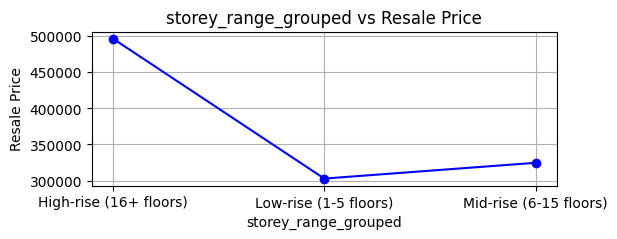

In [88]:
# Assuming 'df' is your DataFrame
grouped_data = df.groupby('storey_range_grouped')['resale_price'].mean()
plt.figure(figsize=(6,2))
plt.plot(grouped_data.index, grouped_data.values,marker='o', linestyle='-', color='b')
plt.xlabel('storey_range_grouped')  # Label for the x-axis
plt.ylabel('Resale Price')  # Label for the y-axis
plt.title('storey_range_grouped vs Resale Price')  # Title for the plot
plt.xticks(rotation=0)  # Rotate x-axis labels if they overlap
plt.grid()
plt.show()  # Display the plot

In [89]:
df["town"].value_counts()#27

town
TAMPINES           80567
YISHUN             70604
JURONG WEST        67225
BEDOK              66991
WOODLANDS          66123
ANG MO KIO         52354
HOUGANG            51208
BUKIT BATOK        45012
CHOA CHU KANG      38767
BUKIT MERAH        34673
PASIR RIS          33400
SENGKANG           33241
TOA PAYOH          31756
QUEENSTOWN         28981
GEYLANG            28385
CLEMENTI           28182
BUKIT PANJANG      27954
KALLANG/WHAMPOA    27519
JURONG EAST        24948
SERANGOON          22968
BISHAN             21389
PUNGGOL            21375
SEMBAWANG          14166
MARINE PARADE       8072
CENTRAL AREA        7207
BUKIT TIMAH         2544
LIM CHU KANG          63
Name: count, dtype: int64

C:\Users\nandh\AppData\Local\Temp\ipykernel_13632\3683980406.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('town')['resale_price'].mean()


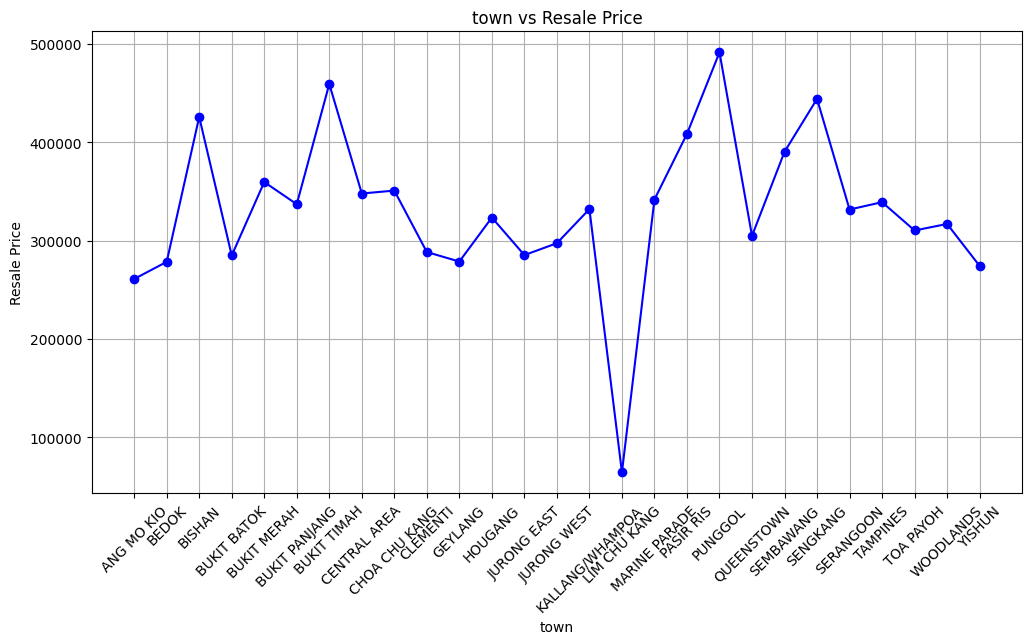

In [90]:
# Assuming 'df' is your DataFrame
grouped_data = df.groupby('town')['resale_price'].mean()
plt.figure(figsize=(12,6))
plt.plot(grouped_data.index, grouped_data.values,marker='o', linestyle='-', color='b')
plt.xlabel('town')  # Label for the x-axis
plt.ylabel('Resale Price')  # Label for the y-axis
plt.title('town vs Resale Price')  # Title for the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.grid()
plt.show()  # Display the plot

In [91]:
for i in df["street_name"].unique():
    print(i,end=",")

ANG MO KIO AVE 1,ANG MO KIO AVE 3,ANG MO KIO AVE 4,ANG MO KIO AVE 10,ANG MO KIO AVE 5,ANG MO KIO AVE 8,ANG MO KIO AVE 6,ANG MO KIO AVE 9,ANG MO KIO AVE 2,BEDOK RESERVOIR RD,BEDOK NTH ST 3,BEDOK STH RD,NEW UPP CHANGI RD,BEDOK NTH RD,BEDOK STH AVE 1,CHAI CHEE RD,CHAI CHEE DR,BEDOK NTH AVE 4,BEDOK STH AVE 3,BEDOK STH AVE 2,BEDOK NTH ST 2,BEDOK NTH ST 4,BEDOK NTH AVE 2,BEDOK NTH AVE 3,BEDOK NTH AVE 1,BEDOK NTH ST 1,CHAI CHEE ST,SIN MING RD,SHUNFU RD,BT BATOK ST 11,BT BATOK WEST AVE 8,BT BATOK WEST AVE 6,BT BATOK ST 21,BT BATOK EAST AVE 5,BT BATOK EAST AVE 4,HILLVIEW AVE,BT BATOK CTRL,BT BATOK ST 31,BT BATOK EAST AVE 3,TAMAN HO SWEE,TELOK BLANGAH CRES,BEO CRES,TELOK BLANGAH DR,DEPOT RD,TELOK BLANGAH RISE,JLN BT MERAH,HENDERSON RD,INDUS RD,BT MERAH VIEW,HENDERSON CRES,BT PURMEI RD,TELOK BLANGAH HTS,EVERTON PK,KG BAHRU HILL,REDHILL CL,HOY FATT RD,HAVELOCK RD,JLN KLINIK,JLN RUMAH TINGGI,JLN BT HO SWEE,KIM CHENG ST,MOH GUAN TER,TELOK BLANGAH WAY,KIM TIAN RD,KIM TIAN PL,EMPRESS RD,QUEEN'S RD,FAR

In [92]:
df["street_name"].value_counts() #588

street_name
YISHUN RING RD        17699
BEDOK RESERVOIR RD    14794
ANG MO KIO AVE 10     13862
ANG MO KIO AVE 3      12193
HOUGANG AVE 8          9401
                      ...  
SENGKANG WEST RD          4
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
CANBERRA VIEW             1
TAMPINES NTH DR 1         1
Name: count, Length: 588, dtype: int64

In [93]:
df["flat_model"].value_counts().sort_index() #34

flat_model
2-ROOM                        21
2-room                       156
3Gen                          45
APARTMENT                   9887
Adjoined flat               1268
Apartment                  25915
DBSS                        3412
IMPROVED                   73296
IMPROVED-MAISONETTE           44
Improved                  170400
Improved-Maisonette           84
MAISONETTE                 12195
MODEL A                    70234
MODEL A-MAISONETTE           981
MULTI GENERATION             279
Maisonette                 17708
Model A                   198497
Model A-Maisonette          1110
Model A2                   10246
Multi Generation             265
NEW GENERATION             78646
New Generation            111077
PREMIUM APARTMENT              6
Premium Apartment          47820
Premium Apartment Loft       114
Premium Maisonette            86
SIMPLIFIED                 23211
STANDARD                   17323
Simplified                 34613
Standard                   25368

In [94]:
df['flat_model'] = df['flat_model'].replace({
    'MULTI GENERATION': 'Multi Generation',
    'IMPROVED-MAISONETTE': 'Improved Maisonette',
    'Improved-Maisonette': 'Improved Maisonette',
    'PREMIUM APARTMENT': 'Premium Apartment',
    'IMPROVED': 'Improved',
    '2-ROOM': '2-Room',
    '2-room': '2-Room',
    '3Gen': '3-Gen',
    'MODEL A-MAISONETTE': 'Model A-Maisonette',
    'NEW GENERATION': 'New Generation',
    'MODEL A': 'Model A',
    'SIMPLIFIED': 'Simplified',
    'STANDARD': 'Standard',
    'TERRACE':'Terrace',
    'MAISONETTE': 'Maisonette',
    'APARTMENT': 'Apartment'})

C:\Users\nandh\AppData\Local\Temp\ipykernel_13632\2347218928.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['flat_model'] = df['flat_model'].replace({


In [95]:
df["flat_model"].value_counts().sort_index() #21

flat_model
2-Room                       177
3-Gen                         45
Adjoined flat               1268
Apartment                  35802
DBSS                        3412
Improved Maisonette          128
Improved                  243696
Maisonette                 29903
Model A                   268731
Model A-Maisonette          2091
Model A2                   10246
Multi Generation             544
New Generation            189723
Premium Apartment          47826
Premium Apartment Loft       114
Premium Maisonette            86
Simplified                 57824
Standard                   42691
Terrace                      697
Type S1                      447
Type S2                      223
Name: count, dtype: int64

In [96]:
df["block"].value_counts()

block
2       4601
1       4065
110     3432
101     3423
4       3356
        ... 
457B       1
458B       1
226F       1
458C       1
132B       1
Name: count, Length: 2718, dtype: int64

In [97]:
df["block"].unique()

['309', '216', '211', '202', '235', ..., '132B', '458B', '458A', '458C', '610C']
Length: 2718
Categories (2718, object): ['1', '10', '100', '101', ..., '99B', '99C', '9A', '9B']

In [98]:
import re
def group_by_numeric(block):
    match = re.match(r'(\d+)', block)  # Match the numeric part
    if match:
        return match.group(1)  # Return the numeric part as group
    return block  # If no match, return the block as it is

# Apply the function to create a new column "block_group"
df['block_group'] = df['block'].apply(group_by_numeric)

In [99]:
for i in df["block"].unique():
    print(i,end=",")

309,216,211,202,235,232,308,220,219,247,320,252,223,230,329,313,117,110,343,345,346,121,129,130,128,127,126,403,404,405,417,418,419,441,442,443,444,450,435,433,434,424,425,466,471,474,570,586,455,465,463,564,560,558,559,538,534,601,603,604,608,611,505,503,610,607,524,513,643,542,548,550,639,637,330,333,156,152,178,180,209,231,254,103,105,344,324,120,124,414,438,427,428,473,573,585,456,544,640,638,646,150,179,336,335,401,439,430,460,459,716,545,620,622,259,101,18,28,29,30,75,76,501,502,504,2,20,21,59,58,55,22,104,107,69,33,46,116,115,125,138,87,100,412,402,416,136,529,510,525,218,213,532,533,536,537,44,540,702,615,712,50,54,606,616,15,34,36,35,41,42,53,51,8,718,724,166,71,82,78,79,80,134,132,131,133,89,62,422,507,508,517,95,93,43,543,547,708,707,713,609,61,56,165,710,613,602,605,112,1,722,72,31,111,118,96,137,139,725,24,304,310,160,161,164,177,205,248,258,4,6,146,143,145,182,228,227,244,113,163,169,204,135,184,225,123,307,221,214,142,140,141,7,40,77,119,114,5,12,16,13,108,102,106,63,60,

In [100]:
df = df.rename(columns={"month": "year_month"})

In [101]:
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m').dt.to_period('M')
df['year'] = df['year_month'].dt.year
df['month'] = df['year_month'].dt.month

In [102]:
df[["year_month","year","month"]]

,year_month,year,month
0,1990-01,1990,1
1,1990-01,1990,1
2,1990-01,1990,1
3,1990-01,1990,1
4,1990-01,1990,1
...,...,...,...
937646,2024-10,2024,10
937647,2024-10,2024,10
937648,2024-10,2024,10
937649,2024-10,2024,10


In [103]:
print(df[['year', 'month']].info())

<class 'pandas.core.frame.DataFrame'>
Index: 935674 entries, 0 to 937650
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   year    935674 non-null  int64
 1   month   935674 non-null  int64
dtypes: int64(2)
memory usage: 21.4 MB
None


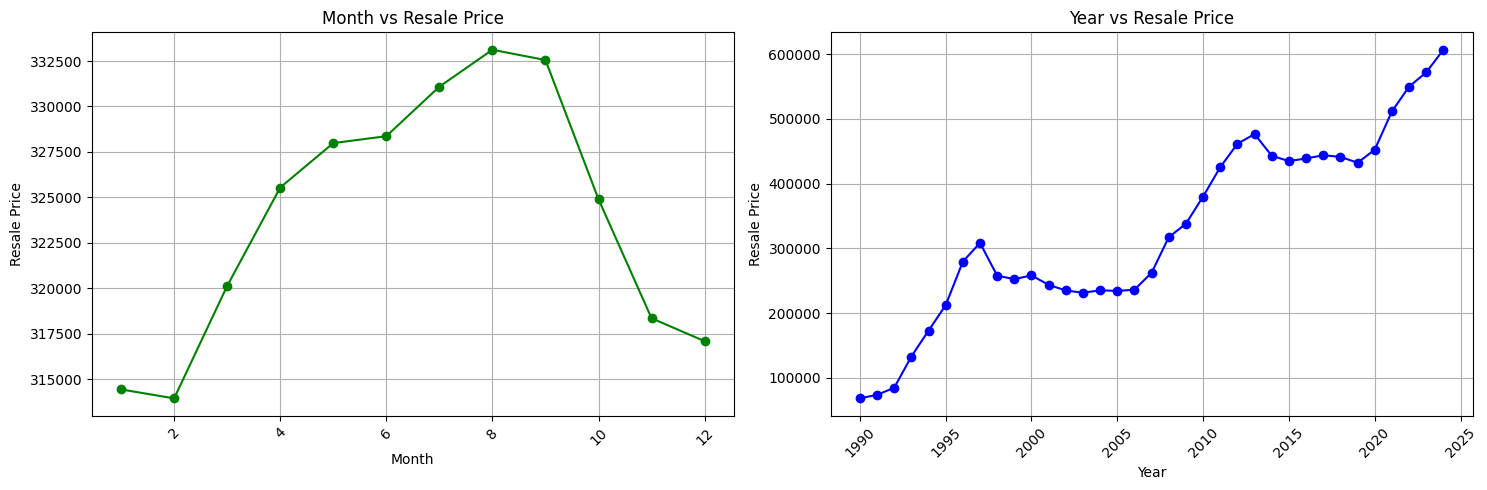

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Plot 1: Month vs Resale Price
grouped_data1 = df.groupby('month')['resale_price'].mean()
axes[0].plot(grouped_data1.index, grouped_data1.values, marker='o', linestyle='-', color='g')
axes[0].set_xlabel('Month')  # Label for the x-axis
axes[0].set_ylabel('Resale Price')  # Label for the y-axis
axes[0].set_title('Month vs Resale Price')  # Title for the plot
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if they overlap
axes[0].grid(True)
# Plot 2: Year vs Resale Price
grouped_data2 = df.groupby('year')['resale_price'].mean()
axes[1].plot(grouped_data2.index, grouped_data2.values, marker='o', linestyle='-', color='b')
axes[1].set_xlabel('Year')  # Label for the x-axis
axes[1].set_ylabel('Resale Price')  # Label for the y-axis
axes[1].set_title('Year vs Resale Price')  # Title for the plot
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if they overlap
axes[1].grid(True)
plt.tight_layout()
plt.show()

In [105]:
df[["lease_commence_year","year_month"]]

,lease_commence_year,year_month
0,1977,1990-01
1,1977,1990-01
2,1977,1990-01
3,1977,1990-01
4,1976,1990-01
...,...,...
937646,1988,2024-10
937647,2015,2024-10
937648,2016,2024-10
937649,1987,2024-10


#### Calculate the difference in years between 'year_month' and 'lease_commence_date'

In [106]:
df['lease_years_difference'] = df['year'] - df['lease_commence_year']

In [107]:
df[["lease_commence_year","year",'lease_years_difference']]

,lease_commence_year,year,lease_years_difference
0,1977,1990,13
1,1977,1990,13
2,1977,1990,13
3,1977,1990,13
4,1976,1990,14
...,...,...,...
937646,1988,2024,36
937647,2015,2024,9
937648,2016,2024,8
937649,1987,2024,37


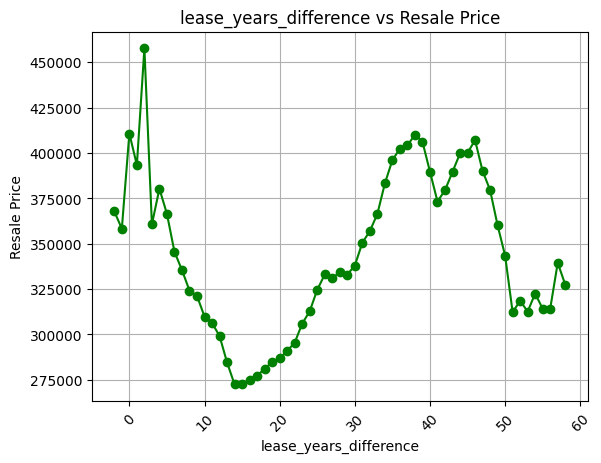

In [108]:
grouped_data = df.groupby('lease_years_difference')['resale_price'].mean()
plt.plot(grouped_data.index, grouped_data.values,marker='o', linestyle='-', color='g')
plt.xlabel('lease_years_difference')  # Label for the x-axis
plt.ylabel('Resale Price')  # Label for the y-axis
plt.title('lease_years_difference vs Resale Price')  # Title for the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.grid()
plt.show()  # Display the plot

In [109]:
for i in df["street_name"].unique():
    print(i)

ANG MO KIO AVE 1
ANG MO KIO AVE 3
ANG MO KIO AVE 4
ANG MO KIO AVE 10
ANG MO KIO AVE 5
ANG MO KIO AVE 8
ANG MO KIO AVE 6
ANG MO KIO AVE 9
ANG MO KIO AVE 2
BEDOK RESERVOIR RD
BEDOK NTH ST 3
BEDOK STH RD
NEW UPP CHANGI RD
BEDOK NTH RD
BEDOK STH AVE 1
CHAI CHEE RD
CHAI CHEE DR
BEDOK NTH AVE 4
BEDOK STH AVE 3
BEDOK STH AVE 2
BEDOK NTH ST 2
BEDOK NTH ST 4
BEDOK NTH AVE 2
BEDOK NTH AVE 3
BEDOK NTH AVE 1
BEDOK NTH ST 1
CHAI CHEE ST
SIN MING RD
SHUNFU RD
BT BATOK ST 11
BT BATOK WEST AVE 8
BT BATOK WEST AVE 6
BT BATOK ST 21
BT BATOK EAST AVE 5
BT BATOK EAST AVE 4
HILLVIEW AVE
BT BATOK CTRL
BT BATOK ST 31
BT BATOK EAST AVE 3
TAMAN HO SWEE
TELOK BLANGAH CRES
BEO CRES
TELOK BLANGAH DR
DEPOT RD
TELOK BLANGAH RISE
JLN BT MERAH
HENDERSON RD
INDUS RD
BT MERAH VIEW
HENDERSON CRES
BT PURMEI RD
TELOK BLANGAH HTS
EVERTON PK
KG BAHRU HILL
REDHILL CL
HOY FATT RD
HAVELOCK RD
JLN KLINIK
JLN RUMAH TINGGI
JLN BT HO SWEE
KIM CHENG ST
MOH GUAN TER
TELOK BLANGAH WAY
KIM TIAN RD
KIM TIAN PL
EMPRESS RD
QUEEN'S RD
FAR

In [110]:
df.isnull().sum()

year_month                0
town                      0
flat_type                 0
block                     0
street_name               0
storey_range              0
floor_area_sqm            0
flat_model                0
lease_commence_year       0
resale_price              0
storey_range_grouped      0
block_group               0
year                      0
month                     0
lease_years_difference    0
dtype: int64

In [145]:
from sklearn.preprocessing import LabelEncoder

In [111]:
le = LabelEncoder()

In [112]:
df["storey_range_group_encoded"] = le.fit_transform(df['storey_range_grouped'])
category_to_code1 = {category: code for category, code in zip(le.classes_, range(len(le.classes_)))}
category_to_code1

{'High-rise (16+ floors)': 0,
 'Low-rise (1-5 floors)': 1,
 'Mid-rise (6-15 floors)': 2}

In [113]:
df["flat_type"].value_counts()

flat_type
4-ROOM              356215
3-ROOM              297603
5-ROOM              197654
EXECUTIVE            70288
2-ROOM               12094
1-ROOM                1276
MULTI-GENERATION       544
Name: count, dtype: int64

In [114]:
flat_type_order = [
    '1-ROOM', 
    '2-ROOM', 
    '3-ROOM', 
    '4-ROOM', 
    '5-ROOM', 
    'EXECUTIVE', 
    'MULTI-GENERATION']

In [115]:
df['flat_type_encoded'] = le.fit_transform(df['flat_type'])
category_to_code2 = {category: code for category, code in zip(le.classes_, range(len(le.classes_)))}
category_to_code2

{'1-ROOM': 0,
 '2-ROOM': 1,
 '3-ROOM': 2,
 '4-ROOM': 3,
 '5-ROOM': 4,
 'EXECUTIVE': 5,
 'MULTI-GENERATION': 6}

In [116]:
df['flat_model_encoded'] = le.fit_transform(df['flat_model'])
category_to_code3 = {category: code for category, code in zip(le.classes_, range(len(le.classes_)))}
category_to_code3

{'2-Room': 0,
 '3-Gen': 1,
 'Adjoined flat': 2,
 'Apartment': 3,
 'DBSS': 4,
 'Improved': 5,
 'Improved Maisonette': 6,
 'Maisonette': 7,
 'Model A': 8,
 'Model A-Maisonette': 9,
 'Model A2': 10,
 'Multi Generation': 11,
 'New Generation': 12,
 'Premium Apartment': 13,
 'Premium Apartment Loft': 14,
 'Premium Maisonette': 15,
 'Simplified': 16,
 'Standard': 17,
 'Terrace': 18,
 'Type S1': 19,
 'Type S2': 20}

In [117]:
df['town_encoded'] = df.groupby('town')['resale_price'].transform('mean')
df['town_encoded'] = le.fit_transform(df['town'])
category_to_code4 = {category: code for category, code in zip(le.classes_, range(len(le.classes_)))}
category_to_code4

C:\Users\nandh\AppData\Local\Temp\ipykernel_13632\1537147461.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['town_encoded'] = df.groupby('town')['resale_price'].transform('mean')


{'ANG MO KIO': 0,
 'BEDOK': 1,
 'BISHAN': 2,
 'BUKIT BATOK': 3,
 'BUKIT MERAH': 4,
 'BUKIT PANJANG': 5,
 'BUKIT TIMAH': 6,
 'CENTRAL AREA': 7,
 'CHOA CHU KANG': 8,
 'CLEMENTI': 9,
 'GEYLANG': 10,
 'HOUGANG': 11,
 'JURONG EAST': 12,
 'JURONG WEST': 13,
 'KALLANG/WHAMPOA': 14,
 'LIM CHU KANG': 15,
 'MARINE PARADE': 16,
 'PASIR RIS': 17,
 'PUNGGOL': 18,
 'QUEENSTOWN': 19,
 'SEMBAWANG': 20,
 'SENGKANG': 21,
 'SERANGOON': 22,
 'TAMPINES': 23,
 'TOA PAYOH': 24,
 'WOODLANDS': 25,
 'YISHUN': 26}

In [118]:
df['street_name_encoded'] = df.groupby('street_name')['resale_price'].transform('mean')
df['street_name_encoded'] = le.fit_transform(df['street_name'])
category_to_code5 = {category: code for category, code in zip(le.classes_, range(len(le.classes_)))}
category_to_code5

C:\Users\nandh\AppData\Local\Temp\ipykernel_13632\3167566113.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['street_name_encoded'] = df.groupby('street_name')['resale_price'].transform('mean')


{'ADMIRALTY DR': 0,
 'ADMIRALTY LINK': 1,
 'AH HOOD RD': 2,
 'ALEXANDRA RD': 3,
 'ALJUNIED AVE 2': 4,
 'ALJUNIED CRES': 5,
 'ALJUNIED RD': 6,
 'ANCHORVALE CRES': 7,
 'ANCHORVALE DR': 8,
 'ANCHORVALE LANE': 9,
 'ANCHORVALE LINK': 10,
 'ANCHORVALE RD': 11,
 'ANCHORVALE ST': 12,
 'ANG MO KIO AVE 1': 13,
 'ANG MO KIO AVE 10': 14,
 'ANG MO KIO AVE 2': 15,
 'ANG MO KIO AVE 3': 16,
 'ANG MO KIO AVE 4': 17,
 'ANG MO KIO AVE 5': 18,
 'ANG MO KIO AVE 6': 19,
 'ANG MO KIO AVE 8': 20,
 'ANG MO KIO AVE 9': 21,
 'ANG MO KIO ST 11': 22,
 'ANG MO KIO ST 21': 23,
 'ANG MO KIO ST 31': 24,
 'ANG MO KIO ST 32': 25,
 'ANG MO KIO ST 44': 26,
 'ANG MO KIO ST 51': 27,
 'ANG MO KIO ST 52': 28,
 'ANG MO KIO ST 61': 29,
 'BAIN ST': 30,
 'BALAM RD': 31,
 'BANGKIT RD': 32,
 'BEACH RD': 33,
 'BEDOK CTRL': 34,
 'BEDOK NTH AVE 1': 35,
 'BEDOK NTH AVE 2': 36,
 'BEDOK NTH AVE 3': 37,
 'BEDOK NTH AVE 4': 38,
 'BEDOK NTH RD': 39,
 'BEDOK NTH ST 1': 40,
 'BEDOK NTH ST 2': 41,
 'BEDOK NTH ST 3': 42,
 'BEDOK NTH ST 4': 43,


In [119]:
df["block_group_enc"] = le.fit_transform(df['block_group'])
category_to_code6 = {category: code for category, code in zip(le.classes_, range(len(le.classes_)))}
category_to_code6

{'1': 0,
 '10': 1,
 '100': 2,
 '101': 3,
 '102': 4,
 '103': 5,
 '104': 6,
 '105': 7,
 '106': 8,
 '107': 9,
 '108': 10,
 '109': 11,
 '11': 12,
 '110': 13,
 '111': 14,
 '112': 15,
 '113': 16,
 '114': 17,
 '115': 18,
 '116': 19,
 '117': 20,
 '118': 21,
 '119': 22,
 '12': 23,
 '120': 24,
 '121': 25,
 '122': 26,
 '123': 27,
 '124': 28,
 '125': 29,
 '126': 30,
 '127': 31,
 '128': 32,
 '129': 33,
 '13': 34,
 '130': 35,
 '131': 36,
 '132': 37,
 '133': 38,
 '134': 39,
 '135': 40,
 '136': 41,
 '137': 42,
 '138': 43,
 '139': 44,
 '14': 45,
 '140': 46,
 '141': 47,
 '142': 48,
 '143': 49,
 '144': 50,
 '145': 51,
 '146': 52,
 '147': 53,
 '148': 54,
 '149': 55,
 '15': 56,
 '150': 57,
 '151': 58,
 '152': 59,
 '153': 60,
 '154': 61,
 '155': 62,
 '156': 63,
 '157': 64,
 '158': 65,
 '159': 66,
 '16': 67,
 '160': 68,
 '161': 69,
 '162': 70,
 '163': 71,
 '164': 72,
 '165': 73,
 '166': 74,
 '167': 75,
 '168': 76,
 '169': 77,
 '17': 78,
 '170': 79,
 '171': 80,
 '172': 81,
 '173': 82,
 '174': 83,
 '175': 84,


In [120]:
town_street_map  = {
    "ANG MO KIO": {"ANG MO KIO ST 31", "ANG MO KIO AVE 10", "ANG MO KIO ST 61", "ANG MO KIO ST 44", "ANG MO KIO ST 51", "ANG MO KIO ST 32",
                    "ANG MO KIO AVE 1", "ANG MO KIO AVE 6", "ANG MO KIO AVE 9", "ANG MO KIO ST 11", "ANG MO KIO AVE 8", "ANG MO KIO ST 21",
                      "ANG MO KIO AVE 2", "ANG MO KIO ST 52", "ANG MO KIO AVE 5", "ANG MO KIO AVE 4", "ANG MO KIO AVE 3"},
    "BEDOK": {"JLN DAMAI", "BEDOK RESERVOIR CRES", "BEDOK NTH ST 2", "CHAI CHEE AVE", "BEDOK STH RD", "BEDOK NTH AVE 2", "CHAI CHEE ST",
               "BEDOK STH AVE 3", "LENGKONG TIGA", "BEDOK CTRL", "CHAI CHEE DR", "BEDOK STH AVE 1", "BEDOK NTH ST 4", "BEDOK NTH ST 3", 
               "BEDOK NTH AVE 1", "JLN TENAGA", "BEDOK NTH AVE 3", "BEDOK NTH AVE 4", "BEDOK RESERVOIR RD", "BEDOK STH AVE 2",
                 "NEW UPP CHANGI RD", "BEDOK RESERVOIR VIEW", "BEDOK NTH RD", "CHAI CHEE RD", "EAST COAST RD", "BEDOK NTH ST 1"},
    "BISHAN": {"SIN MING RD", "BISHAN ST 12", "BISHAN ST 13", "SIN MING AVE", "BISHAN ST 24", "BISHAN ST 11", "SHUNFU RD", "BISHAN ST 22",
                "BRIGHT HILL DR", "BISHAN ST 23"},
    "BUKIT BATOK": {"HILLVIEW AVE", "BT BATOK ST 32", "BT BATOK EAST AVE 6", "BT BATOK ST 33", "BT BATOK WEST AVE 2", "BT BATOK WEST AVE 6",
                     "BT BATOK ST 22", "BT BATOK WEST AVE 8", "BT BATOK ST 52", "BT BATOK ST 24", "BT BATOK WEST AVE 9", "BT BATOK ST 25",
                       "BT BATOK WEST AVE 4", "BT BATOK ST 51", "BT BATOK ST 21", "BT BATOK EAST AVE 4", "BT BATOK WEST AVE 5", "BT BATOK ST 31",
                         "BT BATOK CTRL", "BT BATOK EAST AVE 5", "BT BATOK EAST AVE 3", "BT BATOK WEST AVE 7", "BT BATOK ST 11", "BT BATOK ST 34"},
    "BUKIT MERAH": {"BT MERAH CTRL", "JLN KLINIK", "TELOK BLANGAH DR", "HAVELOCK RD", "TIONG BAHRU RD", "TELOK BLANGAH RISE", "DELTA AVE", 
                    "JLN RUMAH TINGGI", "MOH GUAN TER", "REDHILL CL", "TAMAN HO SWEE", "BOON TIONG RD", "JLN MEMBINA BARAT", "HENDERSON RD",
                     "REDHILL LANE", "HOY FATT RD", "KIM PONG RD", "SENG POH RD", "JLN MEMBINA", "ALEXANDRA RD", "SPOTTISWOODE PK RD", 
                     "NILE RD", "JLN BT HO SWEE", "HENDERSON CRES", "CANTONMENT CL", "KIM TIAN PL", "KIM TIAN RD", "TELOK BLANGAH HTS", 
                     "BT MERAH LANE 1", "JLN BT MERAH", "REDHILL RD", "KG BAHRU HILL", "INDUS RD", "BT PURMEI RD", "TELOK BLANGAH WAY",
                       "LOWER DELTA RD", "DEPOT RD", "BT MERAH VIEW", "LIM LIAK ST", "SILAT AVE", "EVERTON PK", "BEO CRES", "ZION RD",
                         "KIM CHENG ST", "TELOK BLANGAH CRES", "TELOK BLANGAH ST 31", "LENGKOK BAHRU"},
    "BUKIT PANJANG": {"LOMPANG RD", "PETIR RD", "PENDING RD", "JELAPANG RD", "GANGSA RD", "BANGKIT RD", "SENJA LINK", "SEGAR RD",
                       "SENJA RD", "SAUJANA RD", "BT PANJANG RING RD", "FAJAR RD", "CASHEW RD", "JELEBU RD"},
    "BUKIT TIMAH": {"FARRER RD", "QUEEN'S RD", "TOH YI DR", "EMPRESS RD"},
    "CENTRAL AREA": {"TG PAGAR PLAZA", "JLN KUKOH", "SHORT ST", "OUTRAM PK", "KELANTAN RD", "KRETA AYER RD", "KLANG LANE", "BUFFALO RD",
                      "UPP CROSS ST", "VEERASAMY RD", "SELEGIE RD", "BAIN ST", "CANTONMENT RD", "ROWELL RD", "OUTRAM HILL", "ROCHOR RD",
                        "NEW MKT RD", "CHANDER RD", "SMITH ST", "CHIN SWEE RD", "JLN BERSEH", "WATERLOO ST", "QUEEN ST", "SAGO LANE"},
    "CHOA CHU KANG": {"CHOA CHU KANG AVE 2", "CHOA CHU KANG NTH 6", "CHOA CHU KANG AVE 7", "TECK WHYE AVE", "CHOA CHU KANG NTH 5",
                       "CHOA CHU KANG AVE 3", "TECK WHYE CRES", "CHOA CHU KANG AVE 1", "CHOA CHU KANG AVE 5", "TECK WHYE LANE",
                         "KEAT HONG LINK", "CHOA CHU KANG CTRL", "CHOA CHU KANG ST 62", "CHOA CHU KANG ST 64", "CHOA CHU KANG AVE 4", 
                         "CHOA CHU KANG NTH 7", "CHOA CHU KANG ST 51", "CHOA CHU KANG CRES", "CHOA CHU KANG ST 53", "CHOA CHU KANG LOOP",
                           "CHOA CHU KANG ST 52", "CHOA CHU KANG DR", "JLN TECK WHYE", "CHOA CHU KANG ST 54", "KEAT HONG CL"},
    "CLEMENTI": {"WEST COAST DR", "CLEMENTI ST 14", "CLEMENTI AVE 5", "CLEMENTI AVE 3", "C'WEALTH AVE WEST", "CLEMENTI AVE 4",
                  "CLEMENTI ST 13", "CLEMENTI ST 11", "CLEMENTI WEST ST 1", "CLEMENTI WEST ST 2", "CLEMENTI AVE 2", "CLEMENTI AVE 1", 
                  "CLEMENTI ST 12", "WEST COAST RD", "CLEMENTI AVE 6"},
    "GEYLANG": {"PIPIT RD", "JLN PASAR BARU", "OLD AIRPORT RD", "GEYLANG EAST AVE 2", "ALJUNIED CRES", "SIMS AVE", "CIRCUIT RD",
                 "GEYLANG EAST AVE 1", "PAYA LEBAR WAY", "JOO CHIAT RD", "PINE CL", "ALJUNIED AVE 2", "DAKOTA CRES", "HAIG RD", 
                 "BALAM RD", "EUNOS RD 5", "UBI AVE 1", "ALJUNIED RD", "SIMS DR", "JLN TIGA", "MACPHERSON LANE", "EUNOS CRES", "JLN DUA",
                   "GEYLANG SERAI", "GEYLANG EAST CTRL", "SIMS PL", "CASSIA CRES"},
    "HOUGANG": {"HOUGANG ST 22", "HOUGANG AVE 1", "HOUGANG ST 52", "BUANGKOK CRES", "HOUGANG AVE 8", "HOUGANG ST 11", "HOUGANG AVE 6",
                 "HOUGANG AVE 4", "HOUGANG ST 32", "UPP SERANGOON RD", "HOUGANG AVE 9", "HOUGANG AVE 10", "HOUGANG AVE 3", "HOUGANG ST 61", 
                 "LOR AH SOO", "HOUGANG ST 21", "UPP SERANGOON VIEW", "HOUGANG AVE 7", "HOUGANG AVE 5", "HOUGANG ST 92", "HOUGANG ST 31",
                   "BUANGKOK LINK", "HOUGANG AVE 2", "HOUGANG ST 51", "HOUGANG ST 91", "HOUGANG CTRL", "BUANGKOK GREEN", "UPP SERANGOON CRES"},
    "JURONG EAST": {"TEBAN GDNS RD", "JURONG EAST ST 21", "JURONG EAST ST 24", "JURONG EAST ST 31", "JURONG EAST ST 32", "PANDAN GDNS", 
                    "JURONG EAST ST 13", "JURONG EAST AVE 1", "TOH GUAN RD"},
    "JURONG WEST": {"CORPORATION DR", "JURONG WEST ST 24", "YUNG HO RD", "YUAN CHING RD", "JURONG WEST ST 92", "JURONG WEST ST 91", 
                    "JURONG WEST ST 61", "JURONG WEST ST 72", "JURONG WEST ST 71", "TAH CHING RD", "JURONG WEST AVE 1", "KANG CHING RD",
                      "BOON LAY PL", "JURONG WEST CTRL 3", "JURONG WEST ST 74", "BOON LAY AVE", "JURONG WEST ST 75", "JURONG WEST ST 42", 
                      "YUNG PING RD", "YUNG KUANG RD", "HU CHING RD", "JURONG WEST ST 81", "JURONG WEST ST 64", "JURONG WEST ST 41", 
                      "YUNG LOH RD", "YUNG SHENG RD", "JURONG WEST AVE 3", "YUNG AN RD", "JURONG WEST ST 51", "JURONG WEST ST 52", 
                      "JURONG WEST ST 73", "HO CHING RD", "JURONG WEST ST 93", "JURONG WEST CTRL 1", "TAO CHING RD", "JURONG WEST ST 65",
                        "JURONG WEST AVE 5", "JURONG WEST ST 62", "BOON LAY DR", "JURONG WEST ST 25"},
    "KALLANG/WHAMPOA": {"BEACH RD", "WHAMPOA WEST", "RACE COURSE RD", "KG KAYU RD", "JLN TENTERAM", "GEYLANG BAHRU", "OWEN RD", "JLN BATU",
                        "JLN RAJAH", "KING GEORGE'S AVE", "JLN MA'MOR", "FARRER PK RD", "CRAWFORD LANE", "UPP BOON KENG RD", "BENDEMEER RD", 
                        "CAMBRIDGE RD", "TOWNER RD", "WHAMPOA DR", "LOR LIMAU", "JLN DUSUN", "KENT RD", "NTH BRIDGE RD", "DORSET RD", "BOON KENG RD", "ST. GEORGE'S LANE", "KALLANG BAHRU", "MCNAIR RD", "FRENCH RD", "WHAMPOA STH", "JLN BAHAGIA", "MOULMEIN RD", "GLOUCESTER RD", "JELLICOE RD", "LOR 3 GEYLANG", "ST. GEORGE'S RD", "TESSENSOHN RD", "WHAMPOA RD", "AH HOOD RD", "KG ARANG RD"},
    "LIM CHU KANG": {"LIM CHU KANG RD"},
    "MARINE PARADE": {"MARINE PARADE CTRL", "MARINE TER", "MARINE DR", "MARINE CRES"},
    "PASIR RIS": {"PASIR RIS ST 71", "PASIR RIS ST 41", "PASIR RIS DR 6", "PASIR RIS ST 51", "PASIR RIS ST 21", "PASIR RIS ST 72", 
                  "PASIR RIS DR 10", "PASIR RIS DR 4", "PASIR RIS ST 52", "PASIR RIS DR 3", "PASIR RIS DR 1", "PASIR RIS ST 53",
                    "CHANGI VILLAGE RD", "PASIR RIS ST 11", "ELIAS RD", "PASIR RIS ST 12", "PASIR RIS ST 13"},
    "PUNGGOL": {"EDGEFIELD PLAINS", "SUMANG WALK", "PUNGGOL RD", "PUNGGOL CTRL", "PUNGGOL WAY", "PUNGGOL FIELD", "PUNGGOL DR", "PUNGGOL PL",
                 "PUNGGOL WALK", "PUNGGOL FIELD WALK", "SUMANG LINK", "PUNGGOL EAST", "EDGEDALE PLAINS", "SUMANG LANE"},
    "QUEENSTOWN": {"MEI LING ST", "CLARENCE LANE", "HOLLAND DR", "TANGLIN HALT RD", "C'WEALTH DR", "MARGARET DR", "DAWSON RD",
                   "DOVER CL EAST", "STRATHMORE AVE", "GHIM MOH LINK", "QUEENSWAY", "C'WEALTH CL", "C'WEALTH CRES", "GHIM MOH RD", 
                   "DOVER RD", "DOVER CRES", "HOLLAND AVE", "STIRLING RD", "QUEEN'S CL", "HOLLAND CL", "C'WEALTH AVE"},
    "SEMBAWANG": {"SEMBAWANG WAY", "CANBERRA LINK", "SEMBAWANG CL", "MONTREAL DR", "SEMBAWANG VISTA", "WELLINGTON CIRCLE",
                  "CANBERRA WALK", "SEMBAWANG DR", "CANBERRA ST", "SEMBAWANG RD", "SEMBAWANG CRES", "CANBERRA RD", "CANBERRA VIEW", 
                  "MONTREAL LINK", "CANBERRA CRES", "ADMIRALTY LINK", "ADMIRALTY DR"},
    "SENGKANG": {"SENGKANG WEST WAY", "SENGKANG EAST AVE", "JLN KAYU", "FERNVALE LINK", "RIVERVALE WALK", "FERNVALE LANE",
                  "SELETAR WEST FARMWAY 6", "ANCHORVALE LINK", "ANCHORVALE DR", "COMPASSVALE LANE", "SENGKANG EAST WAY", "SENGKANG EAST RD",
                    "FERNVALE ST", "SENGKANG WEST RD", "COMPASSVALE ST", "ANCHORVALE RD", "COMPASSVALE WALK", "BUANGKOK STH FARMWAY 1", 
                    "FERNVALE RD", "COMPASSVALE LINK", "ANCHORVALE LANE", "ANCHORVALE ST", "COMPASSVALE BOW", "ANCHORVALE CRES", 
                    "SENGKANG WEST AVE", "COMPASSVALE RD", "SENGKANG CTRL", "RIVERVALE ST", "COMPASSVALE CRES", "RIVERVALE CRES", 
                    "COMPASSVALE DR", "RIVERVALE DR"},
    "SERANGOON": {"SERANGOON NTH AVE 1", "SERANGOON AVE 2", "LOR LEW LIAN", "SERANGOON AVE 1", "SERANGOON CTRL DR", "SERANGOON AVE 4", 
                  "SERANGOON NTH AVE 4", "SERANGOON NTH AVE 2", "SERANGOON NTH AVE 3", "SERANGOON AVE 3", "SERANGOON CTRL"},
    "TAMPINES": {"TAMPINES ST 34", "SIMEI ST 2", "TAMPINES CTRL 1", "TAMPINES ST 41", "TAMPINES ST 84", 
        "TAMPINES AVE 8", "TAMPINES AVE 7", "SIMEI LANE", "TAMPINES ST 21", "TAMPINES AVE 9", 
        "TAMPINES ST 72", "TAMPINES ST 91", "SIMEI ST 4", "TAMPINES NTH DR 1", "TAMPINES ST 82", 
        "SIMEI RD", "TAMPINES AVE 1", "TAMPINES ST 61", "TAMPINES ST 24", "TAMPINES ST 45", 
        "TAMPINES ST 22", "TAMPINES ST 81", "TAMPINES ST 71", "TAMPINES ST 32", "TAMPINES ST 12", 
        "SIMEI ST 5", "TAMPINES ST 43", "SIMEI ST 1", "TAMPINES AVE 5", "TAMPINES AVE 4", 
        "TAMPINES CTRL 7", "TAMPINES ST 11", "TAMPINES ST 86", "TAMPINES CTRL 8", "TAMPINES ST 83", 
        "TAMPINES ST 42", "TAMPINES ST 33", "TAMPINES ST 44", "TAMPINES ST 23"},
    "TOA PAYOH": {
        "LOR 8 TOA PAYOH", "POTONG PASIR AVE 3", "UPP ALJUNIED LANE", "KIM KEAT LINK", "LOR 5 TOA PAYOH", 
        "TOA PAYOH EAST", "LOR 1A TOA PAYOH", "KIM KEAT AVE", "POTONG PASIR AVE 2", "TOA PAYOH NTH", 
        "LOR 1 TOA PAYOH", "LOR 6 TOA PAYOH", "TOA PAYOH CTRL", "LOR 3 TOA PAYOH", "LOR 2 TOA PAYOH", 
        "LOR 4 TOA PAYOH", "BIDADARI PK DR", "JOO SENG RD", "POTONG PASIR AVE 1", "LOR 7 TOA PAYOH"},
    "WOODLANDS": {
        "WOODLANDS DR 40", "WOODLANDS ST 82", "MARSILING LANE", "WOODLANDS AVE 1", "WOODLANDS ST 81", 
        "WOODLANDS CIRCLE", "WOODLANDS AVE 3", "WOODLANDS ST 83", "WOODLANDS DR 71", "WOODLANDS ST 31", 
        "WOODLANDS DR 44", "WOODLANDS DR 60", "WOODLANDS DR 75", "WOODLANDS ST 13", "MARSILING RISE", 
        "WOODLANDS RISE", "WOODLANDS DR 50", "WOODLANDS DR 73", "MARSILING DR", "WOODLANDS AVE 9", 
        "WOODLANDS RING RD", "WOODLANDS ST 32", "WOODLANDS ST 41", "MARSILING CRES", "MARSILING RD", 
        "WOODLANDS AVE 5", "WOODLANDS DR 14", "WOODLANDS DR 53", "WOODLANDS AVE 6", "WOODLANDS DR 52", 
        "WOODLANDS DR 72", "WOODLANDS DR 62", "WOODLANDS ST 11", "WOODLANDS DR 16", "WOODLANDS CTR RD", 
        "WOODLANDS AVE 4", "WOODLANDS DR 70", "WOODLANDS DR 42", "WOODLANDS CRES"},
    "YISHUN": {
        "YISHUN AVE 4", "YISHUN AVE 1", "YISHUN ST 72", "YISHUN ST 71", "YISHUN ST 21", 
        "YISHUN RING RD", "YISHUN ST 22", "YISHUN ST 43", "YISHUN ST 31", "YISHUN AVE 5", 
        "YISHUN AVE 2", "YISHUN ST 11", "YISHUN ST 41", "YISHUN CTRL", "YISHUN AVE 7", 
        "YISHUN AVE 6", "YISHUN ST 51", "YISHUN ST 61", "YISHUN CTRL 1", "YISHUN ST 81", 
        "YISHUN AVE 9", "YISHUN ST 20", "YISHUN AVE 11", "YISHUN AVE 3"}}
flat_type_model_map  = {
    "1-ROOM": {"Improved"},
    "2-ROOM": {"DBSS", "Standard", "Model A", "2-Room", "Premium Apartment", "Improved"},
    "3-ROOM": {"DBSS", "Adjoined flat", "Standard", "New Generation", "Terrace", "Simplified", "Model A", "Premium Apartment", "Improved"},
    "4-ROOM": {"DBSS", "Adjoined flat", "Premium Apartment Loft", "Standard", "New Generation", "Terrace", "Simplified", "Type S1", "Model A", "Model A2", "Premium Apartment", "Improved"},
    "5-ROOM": {"Model A-Maisonette", "Adjoined flat", "DBSS", "Type S2", "Standard", "Improved Maisonette", "Premium Apartment Loft", "3-Gen", "Model A", "Premium Apartment", "Improved"},
    "EXECUTIVE": {"Maisonette", "Adjoined flat", "Premium Maisonette", "Apartment", "Premium Apartment"},
    "MULTI-GENERATION": {"Multi Generation"}}
flat_model_storey_range_map = {
    "2-Room": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "3-Gen": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Adjoined flat": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Apartment": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "DBSS": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Improved": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Maisonette": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Model A": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Model A-Maisonette": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Model A2": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "New Generation": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Premium Apartment": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Premium Apartment Loft": {"Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Premium Maisonette": {"Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Simplified": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Standard": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Type S1": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"},
    "Type S2": {"Low-rise (1-5 floors)", "Mid-rise (6-15 floors)", "High-rise (16+ floors)"}}

In [121]:
category_to_code1

{'High-rise (16+ floors)': 0,
 'Low-rise (1-5 floors)': 1,
 'Mid-rise (6-15 floors)': 2}

In [35]:
import pickle
# Assuming you have all the 'category_to_code' mappings already defined like category_to_code, category_to_code_4, etc.
encoded_map_data = {
    'storey_range': category_to_code1,
    'street_name': category_to_code5,
    'flat_type': category_to_code2,
    'flat_model': category_to_code3,
    'town_encoded': category_to_code4,
    'block_group_enc': category_to_code6,
    'flat_model_storey_range_map':flat_model_storey_range_map,
    'flat_type_model_map': flat_type_model_map,
    'town_street_map':town_street_map}

# Save data to a pickle file
with open("mapping_data.pkl", "wb") as f:
    pickle.dump(encoded_map_data, f)

print("Data saved to pickle file.")

Data saved to pickle file.


In [44]:
# Load data from the pickle file
with open("mapping_data.pkl", "rb") as f:
    loaded_data = pickle.load(f)

# Example: Accessing data
selected_town = "ANG MO KIO"
streets = loaded_data["town_street_map"].get(selected_town, [])
print(streets)  # Output: ["ANG MO KIO ST 31", "ANG MO KIO AVE 10"]

{'ANG MO KIO AVE 6', 'ANG MO KIO ST 52', 'ANG MO KIO ST 31', 'ANG MO KIO AVE 1', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 10', 'ANG MO KIO ST 44', 'ANG MO KIO ST 61', 'ANG MO KIO AVE 3', 'ANG MO KIO ST 11', 'ANG MO KIO ST 51', 'ANG MO KIO AVE 8', 'ANG MO KIO ST 21', 'ANG MO KIO ST 32', 'ANG MO KIO AVE 4', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 2'}


#### OUTLIER

In [122]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['floor_area_sqm', 'lease_commence_year', 'resale_price', 'year',
       'month', 'lease_years_difference'],
      dtype='object')

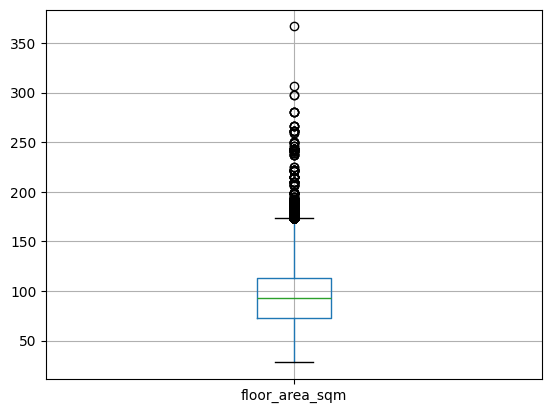

In [123]:
df.boxplot(["floor_area_sqm"]) # others are date values and encoded cols and target col
plt.show()

In [124]:
def count_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)
outlier_counts = {
    'floor_area_sqm': count_outliers_iqr(df, 'floor_area_sqm'),
    'Resale_Price': count_outliers_iqr(df, 'resale_price')}
print(outlier_counts)
max_outliers_column = max(outlier_counts, key=outlier_counts.get)
print(f"Column with most outliers: {max_outliers_column}")

{'floor_area_sqm': 2431, 'Resale_Price': 20977}
Column with most outliers: Resale_Price


In [125]:
def cap_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[feature] = np.clip(data[feature], lower_bound, upper_bound)

# Apply to relevant features
for feature in ['resale_price', 'floor_area_sqm']:
    cap_outliers(df, feature)

#### After Treating Outliers

In [126]:
def count_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)
outlier_counts = {
    'floor_area_sqm': count_outliers_iqr(df, 'floor_area_sqm'),
    'Resale_Price': count_outliers_iqr(df, 'resale_price')}
print(outlier_counts)
max_outliers_column = max(outlier_counts, key=outlier_counts.get)
print(f"Column with most outliers: {max_outliers_column}")

{'floor_area_sqm': 0, 'Resale_Price': 0}
Column with most outliers: floor_area_sqm


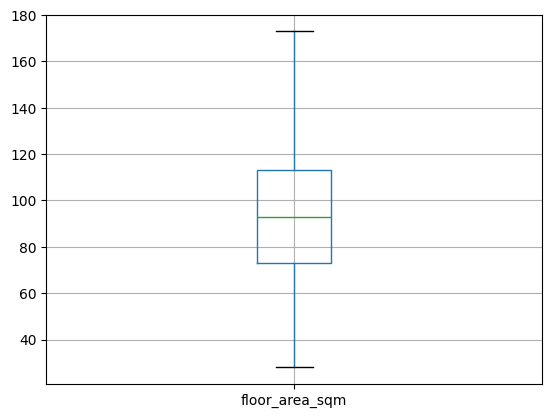

In [127]:
df.boxplot(["floor_area_sqm"])
plt.show()

#### SKEWNESS

In [128]:
df["floor_area_sqm"].skew() # no need to treat

0.33024721648694483

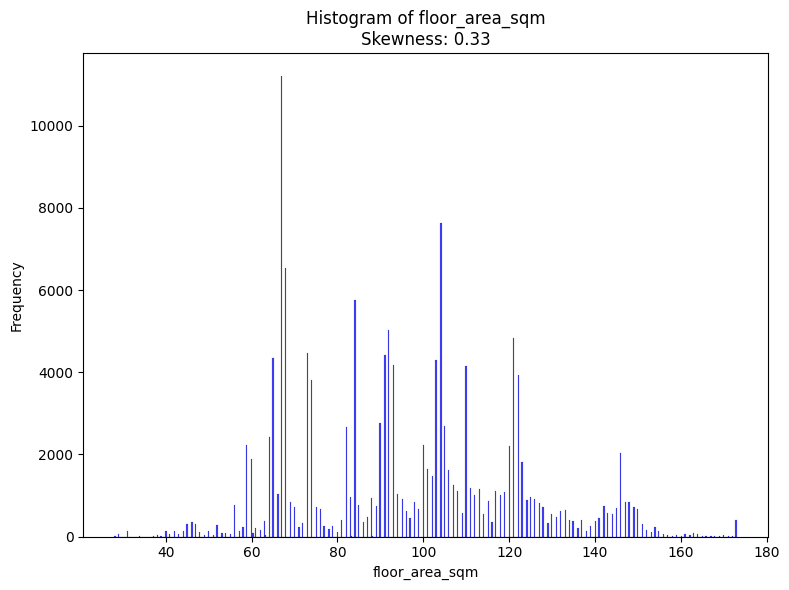

In [129]:
from scipy.stats import skew
# Features to check
features = ['floor_area_sqm']
sample_df = df.sample(150000, random_state=42)
plt.figure(figsize=(8, 6))
for feature in features:
    sns.histplot(sample_df[feature], kde=False, bins=500, color='blue')
    plt.title(f'Histogram of {feature}\nSkewness: {skew(sample_df[feature]):.2f}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [131]:
df.head()

,year_month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_year,resale_price,...,block_group,year,month,lease_years_difference,storey_range_group_encoded,flat_type_encoded,flat_model_encoded,town_encoded,street_name_encoded,block_group_enc
0,1990-01,ANG MO KIO,1-ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,...,309,1990,1,13,2,0,5,0,13,233
1,1990-01,ANG MO KIO,1-ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,...,309,1990,1,13,1,0,5,0,13,233
2,1990-01,ANG MO KIO,1-ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,...,309,1990,1,13,2,0,5,0,13,233
3,1990-01,ANG MO KIO,1-ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,...,309,1990,1,13,2,0,5,0,13,233
4,1990-01,ANG MO KIO,3-ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,...,216,1990,1,14,1,2,12,0,13,130


In [132]:
df.dtypes

year_month                    period[M]
town                           category
flat_type                        object
block                          category
street_name                    category
storey_range                   category
floor_area_sqm                  float64
flat_model                     category
lease_commence_year               int64
resale_price                    float64
storey_range_grouped             object
block_group                      object
year                              int64
month                             int64
lease_years_difference            int64
storey_range_group_encoded        int32
flat_type_encoded                 int32
flat_model_encoded                int32
town_encoded                      int32
street_name_encoded               int32
block_group_enc                   int32
dtype: object

#### Make the Copy of the Data

In [133]:
dataset = df.copy() #just in case

#### Save the Cleaned Data to csv file

In [99]:
df.to_csv("final_data",index=False)

#### Start With Model Building 

In [134]:
data = pd.read_csv(r"D:\CAPSTONE\SINGAPORE\venv\final_data")

In [135]:
data.columns

Index(['year_month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_year',
       'resale_price', 'storey_range_grouped', 'block_group', 'year', 'month',
       'lease_years_difference', 'storey_range_group_enc', 'flat_type_encoded',
       'flat_model_encoded', 'town_encoded', 'street_name_encoded',
       'block_group_enc'],
      dtype='object')

In [136]:
data.drop(["year_month","town","flat_type","block","block_group","street_name","storey_range","storey_range_grouped","flat_model"],inplace=True,axis=1)

In [137]:
data.columns

Index(['floor_area_sqm', 'lease_commence_year', 'resale_price', 'year',
       'month', 'lease_years_difference', 'storey_range_group_enc',
       'flat_type_encoded', 'flat_model_encoded', 'town_encoded',
       'street_name_encoded', 'block_group_enc'],
      dtype='object')

In [138]:
data.dtypes

floor_area_sqm            float64
lease_commence_year         int64
resale_price              float64
year                        int64
month                       int64
lease_years_difference      int64
storey_range_group_enc      int64
flat_type_encoded           int64
flat_model_encoded          int64
town_encoded              float64
street_name_encoded       float64
block_group_enc             int64
dtype: object

In [139]:
data.isnull().sum()

floor_area_sqm            0
lease_commence_year       0
resale_price              0
year                      0
month                     0
lease_years_difference    0
storey_range_group_enc    0
flat_type_encoded         0
flat_model_encoded        0
town_encoded              0
street_name_encoded       0
block_group_enc           0
dtype: int64

In [140]:
data.head()

,floor_area_sqm,lease_commence_year,resale_price,year,month,lease_years_difference,storey_range_group_enc,flat_type_encoded,flat_model_encoded,town_encoded,street_name_encoded,block_group_enc
0,31.0,1977,9000.0,1990,1,13,2,0,5,260966.242335,253548.510417,233
1,31.0,1977,6000.0,1990,1,13,1,0,5,260966.242335,253548.510417,233
2,31.0,1977,8000.0,1990,1,13,2,0,5,260966.242335,253548.510417,233
3,31.0,1977,6000.0,1990,1,13,2,0,5,260966.242335,253548.510417,233
4,73.0,1976,47200.0,1990,1,14,1,2,12,260966.242335,253548.510417,130


In [141]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop(columns=['resale_price'])
y = data['resale_price']

In [142]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression

In [143]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [144]:
model = LinearRegression()

In [146]:
model.fit(X, y)

LinearRegression()

In [147]:
y_pred = model.predict(X_test)

In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [149]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R²: {r2}")

MAE: 57119.45672670269, MSE: 5643689335.7573185, R²: 0.793476696481425


### Ridge L2

In [150]:
ridge_model = Ridge(alpha=1.0, random_state=42)  # Ridge Regression (L2 Regularization)

In [151]:
ridge_model.fit(X_train, y_train)

Ridge(random_state=42)

In [152]:
ridge_preds = ridge_model.predict(X_test)

In [153]:
# Evaluate model
mae = mean_absolute_error(y_test, ridge_preds)
mse = mean_squared_error(y_test, ridge_preds)
r2 = r2_score(y_test, ridge_preds)

print(f"MAE: {mae}, MSE: {mse}, R²: {r2}")

MAE: 57126.951852273436, MSE: 5644116164.208192, R²: 0.7934610772620695


### Lasso L1

In [154]:
lasso_model = Lasso(alpha=0.1, random_state=42)  # Lasso Regression (L1 Regularization)

In [155]:
lasso_model.fit(X_train, y_train)

C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.831e+13, tolerance: 1.791e+12
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, random_state=42)

In [156]:
lasso_preds = lasso_model.predict(X_test)

In [157]:
# Evaluate model
mae = mean_absolute_error(y_test, lasso_preds)
mse = mean_squared_error(y_test, lasso_preds)
r2 = r2_score(y_test, lasso_preds)

print(f"MAE: {mae}, MSE: {mse}, R²: {r2}")

MAE: 57126.94783405897, MSE: 5644116291.058084, R²: 0.7934610726201664


### RandomForest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
rf = RandomForestRegressor()

In [97]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [98]:
y_test = rf.predict(X_test)

In [99]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse= np.sqrt(mse)
mae= mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)  # R-squared (Coefficient of Determination)
print(f"Mean Squared Error: {mse}")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print(f"R-squared: {round(r2,2)}")  

Mean Squared Error: 4812513972.44686
Root Mean Squared Error (RMSE): 69372.28533389152
Mean Absolute Error (MAE): 53145.784621702194
R-squared: 0.82


### Decision Tree Regressor

In [158]:
from sklearn.tree import DecisionTreeRegressor

In [159]:
tree = DecisionTreeRegressor(random_state=42)

In [160]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [161]:
tree_pred = tree.predict(X_test)

In [162]:
# Evaluate the model
mse = mean_squared_error(y_test, tree_pred)  # Mean Squared Error
rmse= np.sqrt(mse)
mae= mean_absolute_error(y_test,tree_pred)
r2 = r2_score(y_test, tree_pred)  # R-squared (Coefficient of Determination)
print(f"Mean Squared Error: {mse}")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print(f"R-squared: {r2}") 

Mean Squared Error: 870571465.9799746
Root Mean Squared Error (RMSE): 29505.44807285554
Mean Absolute Error (MAE): 19363.615873145365
R-squared: 0.9681425953118897


In [308]:
# Install LightGBM and XGBoost (Uncomment to install if not already done)
! pip install lightgbm
! pip install xgboost


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 164.3 kB/s eta 0:00:09
   --- ------------------------------------ 0.1/1.4 MB 437.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 437.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 437.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 437.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 437.6 kB/s eta 0:00:04
   ------ --------------------------------- 0.2/1.4 MB 519.9 kB/s eta 0:00:03
   ------------- -------------------------- 0.5/1.4 MB 921.6 kB/s eta 0:00:02
   ------------- -----


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### LightBGM Regressor

In [163]:
from lightgbm import LGBMRegressor

In [164]:
lgbm_model = LGBMRegressor(random_state=42)

In [165]:
# Train the LightGBM model
lgbm_model.fit(X_train, y_train)
print("LightGBM Model Trained Successfully!")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 654971, number of used features: 11
[LightGBM] [Info] Start training from score 321564.018764
LightGBM Model Trained Successfully!


In [166]:
# Predict on the test set using LightGBM
lgbm_preds = lgbm_model.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_preds)  # Calculate Mean Squared Error
lgbm_r2 = r2_score(y_test, lgbm_preds)  # Calculate R-squared score
print(f"LightGBM Performance - MSE: {lgbm_mse:.4f}, R2: {lgbm_r2:.4f}")

LightGBM Performance - MSE: 934515108.4735, R2: 0.9658


### XGBoost Regressor

In [167]:
from xgboost import XGBRegressor

In [168]:
xgb_model = XGBRegressor(random_state=42)

In [169]:
# Train the XGBoost model
xgb_model.fit(X_train, y_train)
print("XGBoost Model Trained Successfully!")

XGBoost Model Trained Successfully!


In [170]:
# Predict on the test set using XGBoost
xgb_preds = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_preds)  # Calculate Mean Squared Error
xgb_r2 = r2_score(y_test, xgb_preds)  # Calculate R-squared score
print(f"XGBoost Performance - MSE: {xgb_mse:.4f}, R2: {xgb_r2:.4f}")

XGBoost Performance - MSE: 570938206.9892, R2: 0.9791


### COMPARE ALL THE MODELS AND FIX THE BETS ONE

### TEST MANUALLY

In [171]:
data.tail(4).T

,935670,935671,935672,935673
floor_area_sqm,112.000000,113.000000,122.000000,164.000000
lease_commence_year,2015.000000,2016.000000,1987.000000,1992.000000
resale_price,738888.000000,747000.000000,690000.000000,757500.000000
year,2024.000000,2024.000000,2024.000000,2024.000000
month,10.000000,10.000000,10.000000,10.000000
lease_years_difference,9.000000,8.000000,37.000000,32.000000
storey_range_group_enc,1.000000,2.000000,1.000000,2.000000
flat_type_encoded,4.000000,4.000000,4.000000,5.000000
flat_model_encoded,5.000000,5.000000,5.000000,3.000000
town_encoded,274223.634177,274223.634177,274223.634177,274223.634177


### Test Each Model

#### XGBOOST

In [172]:
user_data = np.array([[164,1992,2024,10,32,2,5,3,274223.634177,351254.453357,609]])
y_prediction = xgb_model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 757500.000000 and predicted - 784346.75

Predicted selling price : 784346.75


In [173]:
user_data = np.array([[112,2015,2024,10,9,1,4,5,2724223.634177,323017.852010,240]])
y_prediction = xgb_model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 738888.0 and predicted - 704382.4

Predicted selling price : 704382.4


#### LIGHT GBM

In [174]:
user_data = np.array([[164,1992,2024,10,32,2,5,3,274223.634177,351254.453357,609]])
y_prediction = lgbm_model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 757500.000000 and predicted - 789870.7376196397

Predicted selling price : 789870.7376196397


In [175]:
user_data = np.array([[112,2015,2024,10,9,1,4,5,2724223.634177,323017.852010,240]])
y_prediction = lgbm_model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 738888.0 and predicted - 691485.6515968723

Predicted selling price : 691485.6515968723


#### DECISION TREE

In [176]:
user_data = np.array([[164,1992,2024,10,32,2,5,3,274223.634177,351254.453357,609]])
y_prediction = tree.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 757500.000000 and predicted - 757500.0

Predicted selling price : 757500.0


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [177]:
user_data = np.array([[112,2015,2024,10,9,1,4,5,2724223.634177,323017.852010,240]])
y_prediction = tree.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 738888.0 and predicted - 660000.0

Predicted selling price : 660000.0


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


#### RANDOM FOREST

In [178]:
user_data = np.array([[164,1992,2024,10,32,2,5,3,274223.634177,351254.453357,609]])
y_prediction = rf.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 757500.000000 and predicted - 757500.0

NameError: name 'rf' is not defined

In [178]:
user_data = np.array([[112,2015,2024,10,9,1,4,5,2724223.634177,323017.852010]])
y_prediction = rf.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 738888.0 and predicted - 699612.5

NameError: name 'rf' is not defined

#### RIDGE

In [179]:
user_data = np.array([[164,1992,2024,10,32,2,5,3,274223.634177,351254.453357,609]])
y_prediction = ridge_model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 757500.000000 and predicted - 709082.6416419782

Predicted selling price : 709082.6416419782


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [180]:
user_data = np.array([[112,2015,2024,10,9,1,4,5,2724223.634177,323017.852010,240]])
y_prediction = ridge_model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 738888.0 and predicted - 244424.55893418193

Predicted selling price : 244424.55893418193


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


#### LASSO

In [181]:
user_data = np.array([[164,1992,2024,10,32,2,5,3,274223.634177,351254.453357,609]])
y_prediction = lasso_model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 757500.000000 and predicted - 709082.9040573053

Predicted selling price : 709082.9040573053


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [182]:
user_data = np.array([[112,2015,2024,10,9,1,4,5,2724223.634177,323017.852010,240]])
y_prediction = lasso_model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 738888.0 and predicted - 244424.30382097512

Predicted selling price : 244424.30382097512


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


#### LINEAR REGRESSION

In [183]:
user_data = np.array([[164,1992,2024,10,32,2,5,3,274223.634177,351254.453357,609]])
y_prediction = model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 757500.000000 and predicted - 709458.8651411682

Predicted selling price : 709458.8651411682


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [184]:
user_data = np.array([[112,2015,2024,10,9,1,4,5,2724223.634177,323017.852010,240]])
y_prediction = model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 738888.0 and predicted - 244478.09715570882

Predicted selling price : 244478.09715570882


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [185]:
import pickle

In [186]:
with open(r"D:\CAPSTONE\SINGAPORE\final_model.pkl","wb") as r:
  pickle.dump(tree,r)

In [187]:
with open(r"D:\CAPSTONE\SINGAPORE\final_model.pkl","rb") as r1:
  final_model=pickle.load(r1)

In [188]:
user_data = np.array([[112,2015,2024,10,9,1,4,5,2724223.634177,323017.852010,240]])
y_prediction = final_model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 738888.0 and predicted - 660000.0

Predicted selling price : 660000.0


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [189]:
user_data = np.array([[164,1992,2024,10,32,2,5,3,274223.634177,351254.453357,609]])
y_prediction = final_model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 757500.0 and predicted - 757500.0

Predicted selling price : 757500.0


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [190]:
X.head(1).T

,0
floor_area_sqm,31.000000
lease_commence_year,1977.000000
year,1990.000000
month,1.000000
lease_years_difference,13.000000
storey_range_group_enc,2.000000
flat_type_encoded,0.000000
flat_model_encoded,5.000000
town_encoded,260966.242335
street_name_encoded,253548.510417


In [195]:
y.head(1).T

0    9000.0
Name: resale_price, dtype: float64

In [191]:
user_data = np.array([[31,1977,1990,1,13,2,0,5,260966.242335,253548.510417,233]])
y_prediction = final_model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 9000.0 and predicted - 7000.0

Predicted selling price : 7000.0


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [192]:
user_data = np.array([[31,1977,1990,1,13,1,0,5,260966.242335,253548.510417,233]])
y_prediction = final_model.predict(user_data)
print("Predicted selling price :",y_prediction[0])  # actual - 6000.0 and predicted - 6000.0

Predicted selling price : 6000.0


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [1]:
! pip freeze > requirements.txt